<a href="https://colab.research.google.com/github/hab6620/ML-project/blob/master/ML_project_HAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ML Project 
made by Himanshu Borade



In [ ]:
#importing libraries
import numpy as n
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Bank_Personal_Loan_Modelling_ml.csv to Bank_Personal_Loan_Modelling_ml.csv


In [ ]:
import io
mydata=pd.read_csv(io.BytesIO(uploaded['Bank_Personal_Loan_Modelling_ml.csv']))

In [ ]:
mydata.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
mydata.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


##checking missing or null values

In [ ]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


##summary of data, ie., mean, median, mode &quartile

In [ ]:
mydata.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


##check howmany null value present in a column

In [ ]:
mydata.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

##DATACLEANING
##DROPPING IRRELEVANT COLUMNS
##comparing similarity in age and correlation

In [ ]:
correlation= mydata['Age'].corr(mydata['Experience'])
correlation

0.9942148569683321

In [ ]:
mydata = mydata.drop(['ID','Experience'],axis=1 )

In [ ]:
mydata.head()


,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


## 3.EDA

In [ ]:
mydata.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

### dropping zip code since there are so much differences

In [ ]:
mydata=mydata.drop(['ZIP Code'],axis=1)

In [ ]:
mydata.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


In [ ]:
mydata

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


In [ ]:
mydata.shape

(5000, 11)

In [ ]:
mydata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0
Online,5000.0,0.596800,0.490589,0.0,0.0,1.0,1.0,1.0


In [ ]:
print('people with 0 mortrage =',len(mydata[mydata.Mortgage==0]));

people with 0 mortrage = 3462


In [ ]:
print('people with 0 credit card average =',len(mydata[mydata.CCAvg==0]));

people with 0 credit card average = 106


In [ ]:
mydata.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [ ]:
mydata.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [ ]:
mydata['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [ ]:
mydata['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [ ]:
mydata.CreditCard.value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [ ]:
mydata.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

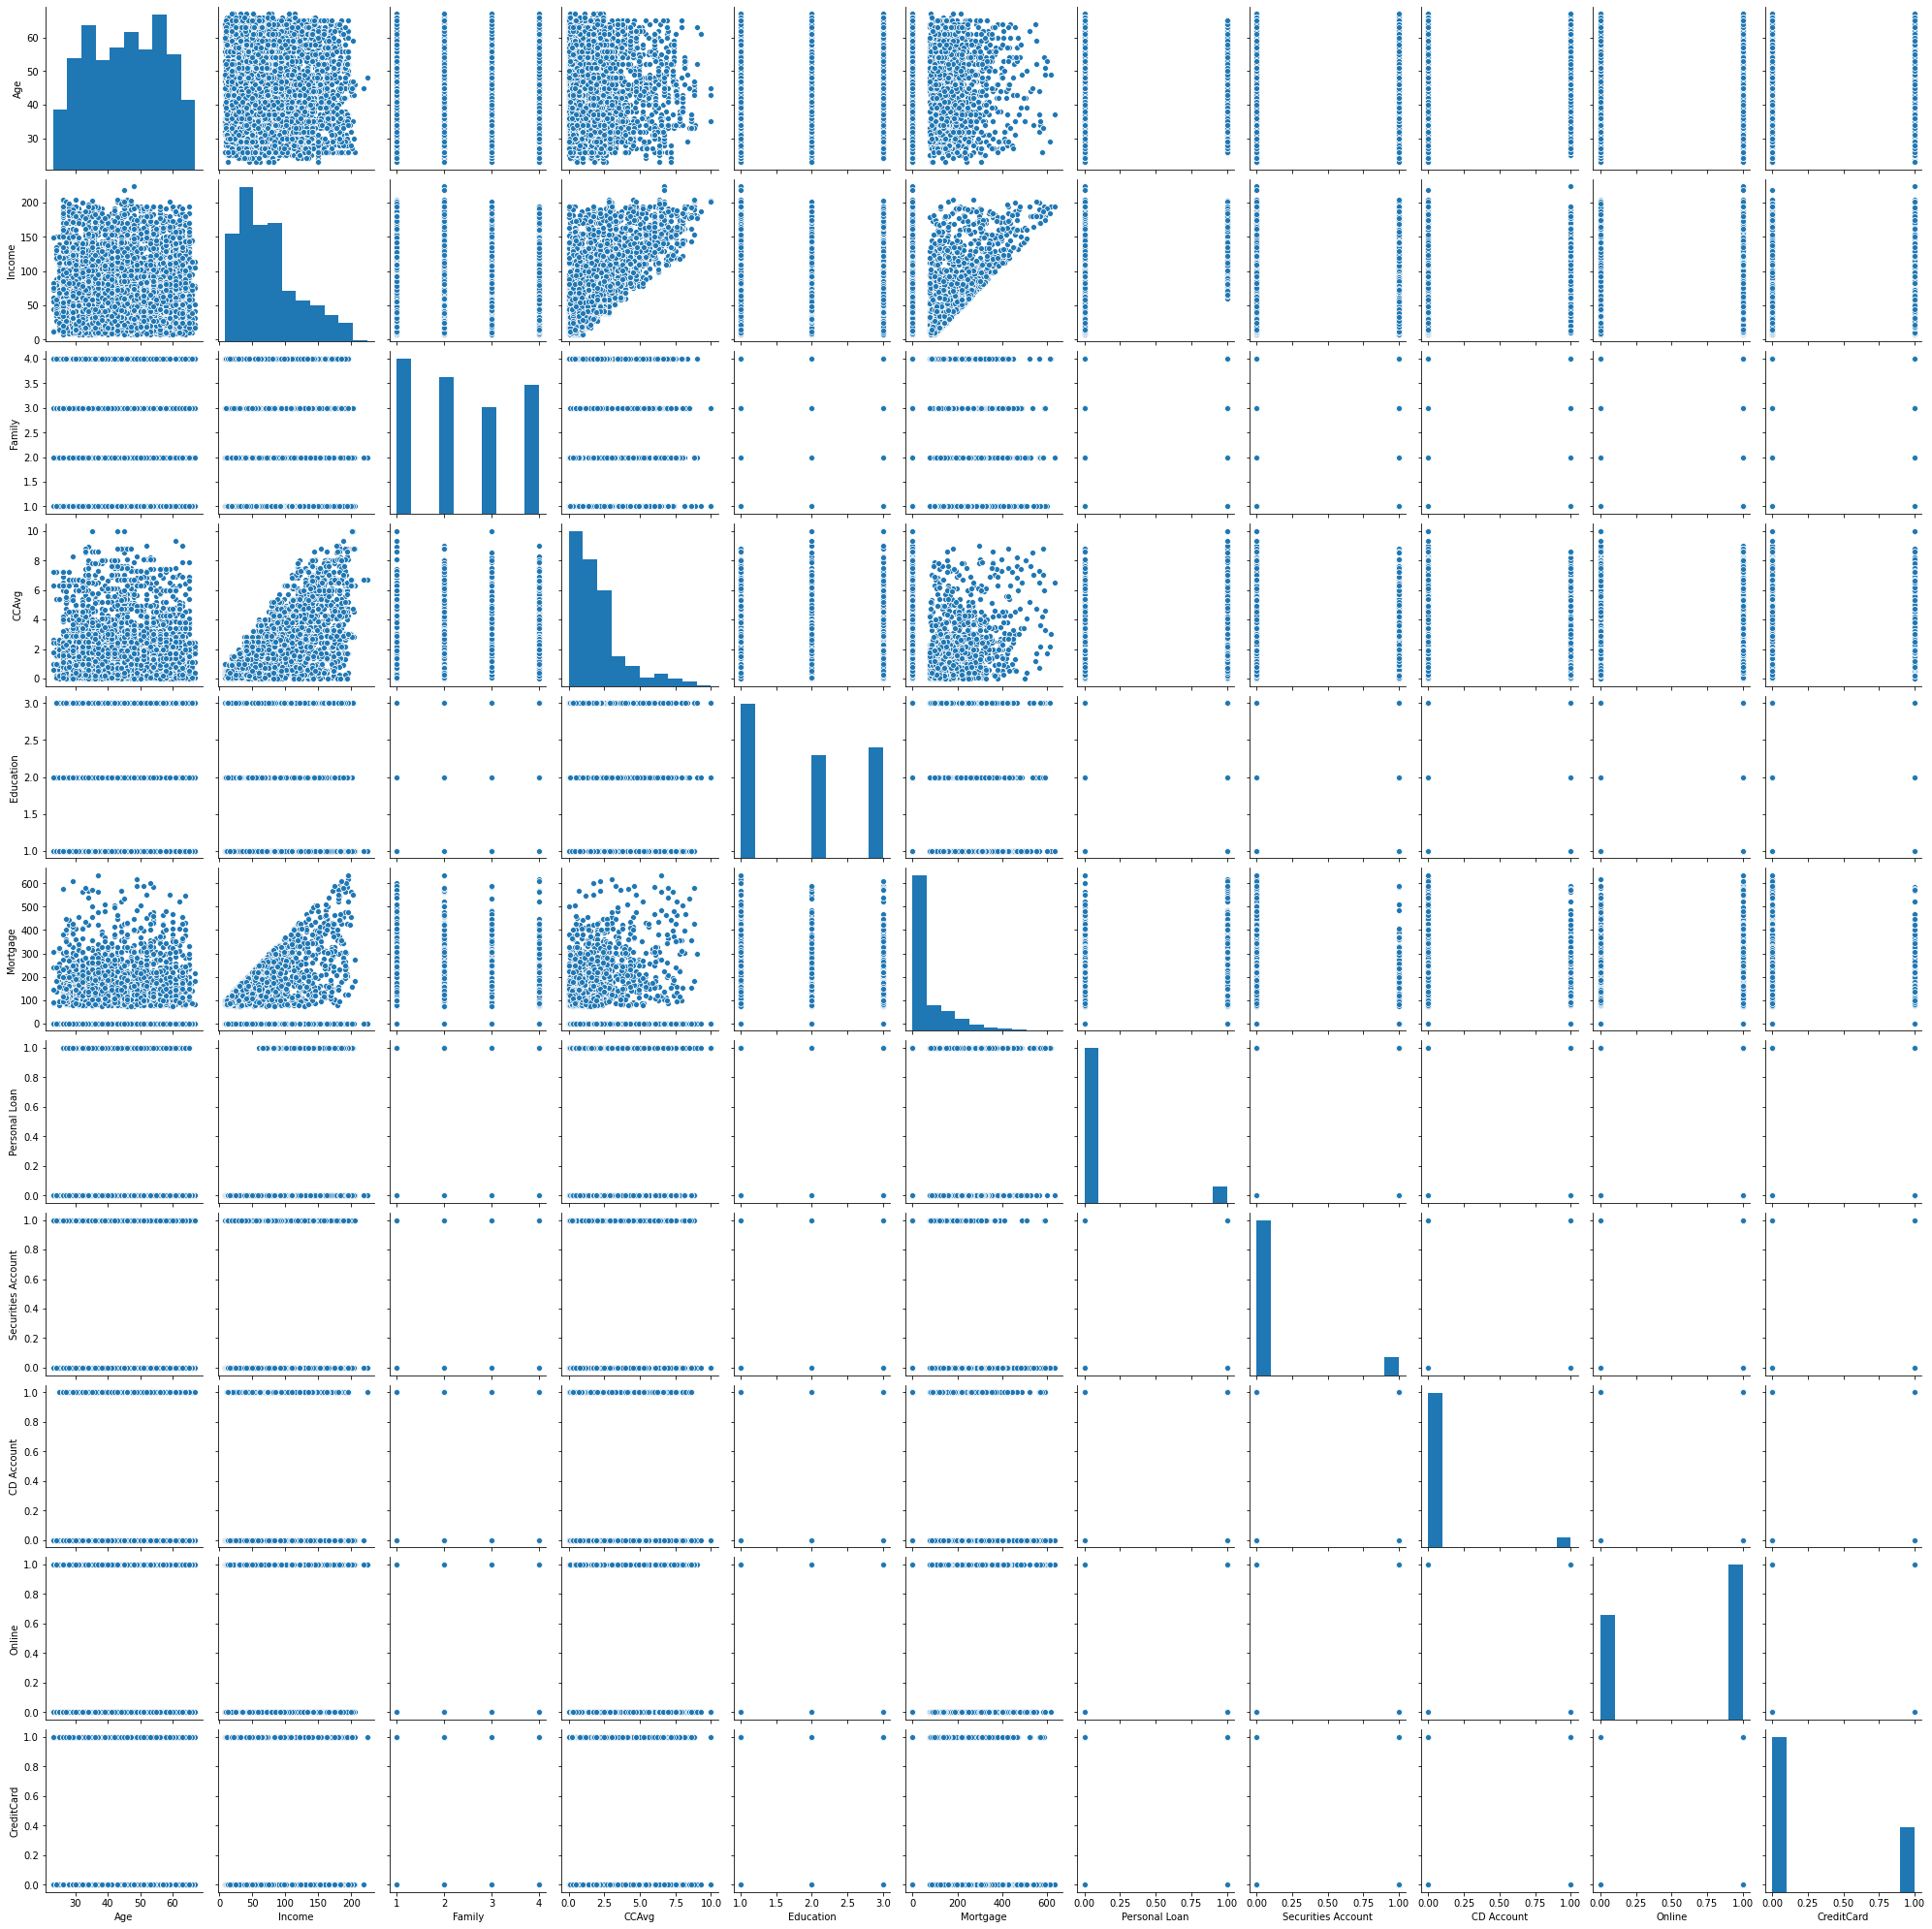

In [ ]:
sb.pairplot(mydata)

## `univariate analysis

In [ ]:
sb.set_style(style='white')

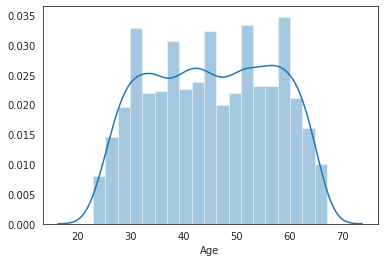

In [ ]:
sb.distplot(mydata.Age);

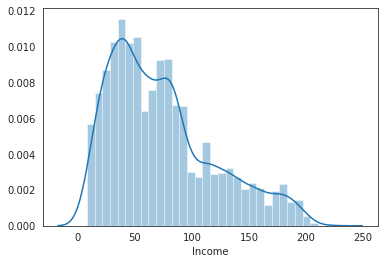

In [ ]:
sb.distplot(mydata.Income);

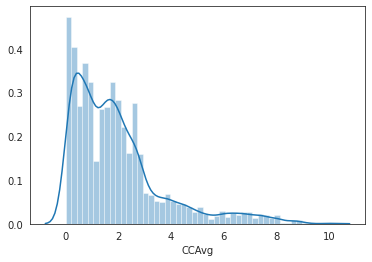

In [ ]:
sb.distplot(mydata.CCAvg);

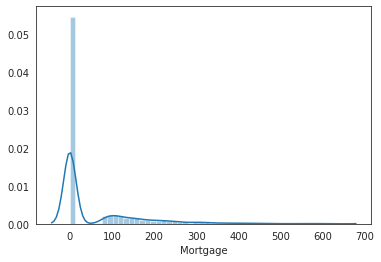

In [ ]:
sb.distplot(mydata.Mortgage);

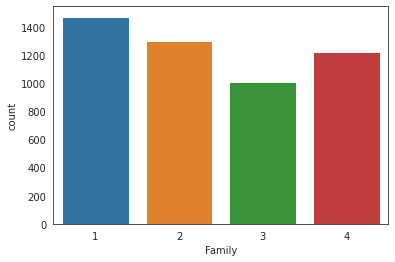

In [ ]:
sb.countplot(mydata.Family);

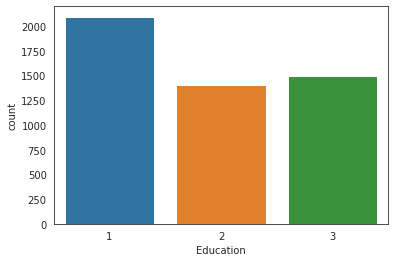

In [ ]:
sb.countplot(mydata.Education);

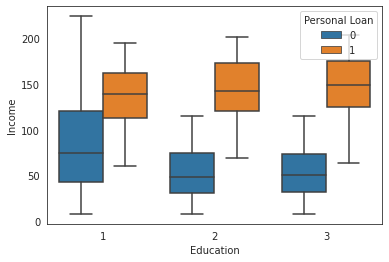

In [ ]:
sb.boxplot(x='Education',y='Income',hue='Personal Loan',data=mydata)

## Education have nothing to do with personal loan but income above 100 are availing it

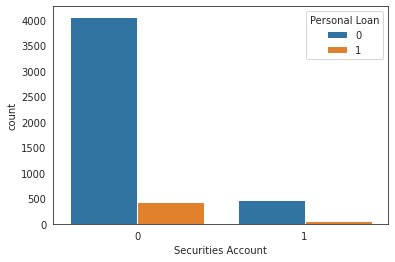

In [ ]:
sb.countplot(x="Securities Account", data=mydata,hue="Personal Loan")

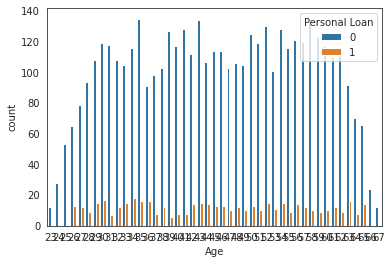

In [ ]:
sb.countplot(x="Age", data=mydata,hue="Personal Loan")

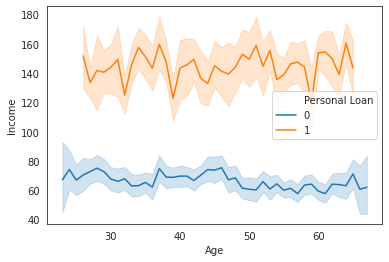

In [ ]:
sb.lineplot(x="Age" , y="Income", hue = 'Personal Loan' , data=mydata)

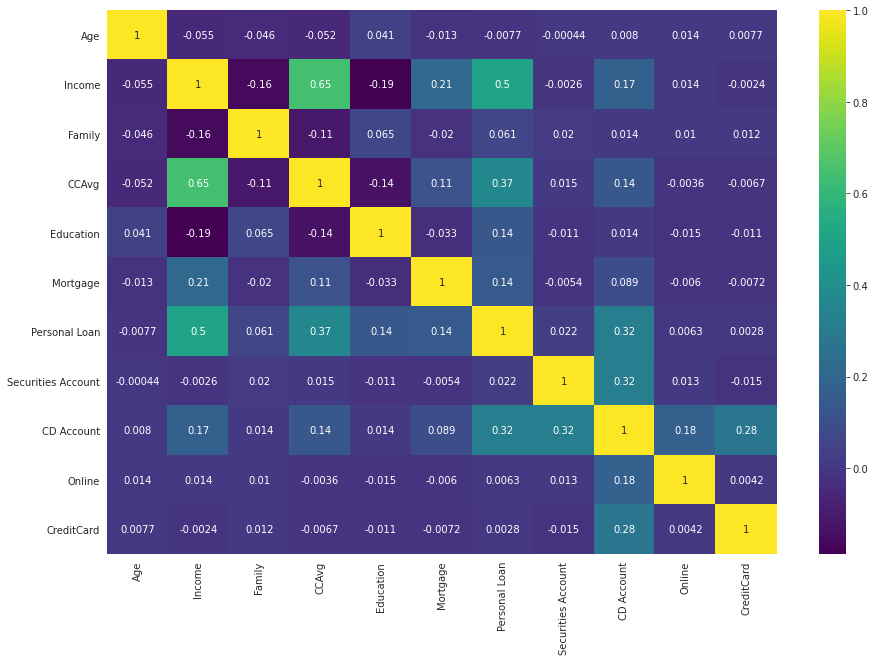

In [ ]:
fig,ax=plt.subplots(figsize=(15,10))
sb.heatmap(mydata.corr(),cmap='viridis',annot=True);

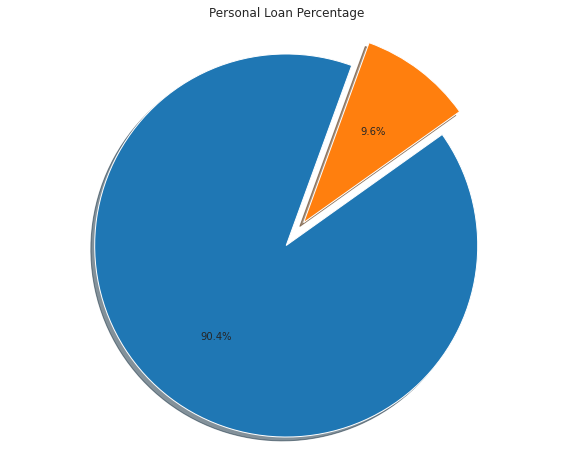

In [ ]:
DF=pd.DataFrame(mydata['Personal Loan'].value_counts()).reset_index()
DF.columns=['Labels','Personal Loan']
fig1,ax1=plt.subplots(figsize=(10,8))
explode=(0,0.15)
ax1.pie(DF['Personal Loan'],explode=explode,autopct='%1.1f%%',shadow=True,startangle=70)
ax1.axis('equal')
plt.title('Personal Loan Percentage')
plt.show()

## 9.6%people are availing loan

# setting datas except loan in one var and loan in one

In [ ]:
datax=mydata.loc[:, mydata.columns != "Personal Loan"]
datay=mydata["Personal Loan"]

In [ ]:
datax.shape,datay.shape

((5000, 10), (5000,))

In [ ]:
datax.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,1,0,0,0
1,45,34,3,1.5,1,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,1


## Transformation of feature variables

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(datax["Income"].values.reshape(-1,1))
t = pt.transform(datax["Income"].values.reshape(-1,1))

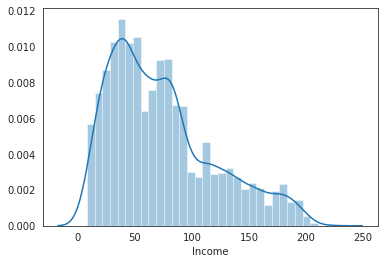

In [ ]:
sb.distplot(mydata.Income)

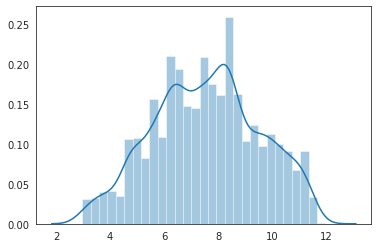

In [ ]:
sb.distplot(t)

##skewness is reduced and outliners are removed from Income

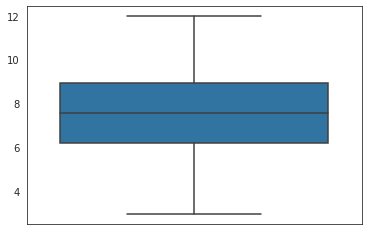

In [ ]:
sb.boxplot(t, orient = "v")

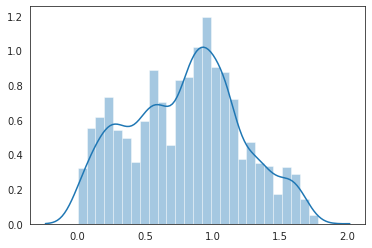

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(datax["CCAvg"].values.reshape(-1,1))
t = pt.transform(datax["CCAvg"].values.reshape(-1,1))
sb.distplot(t)

##skewness is reduced and outliners are removed from CCAvg

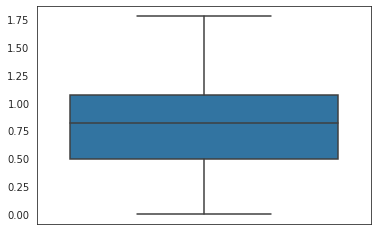

In [ ]:
sb.boxplot(t, orient='v')

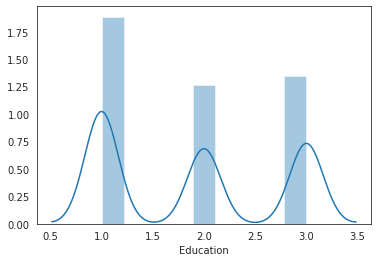

In [ ]:
sb.distplot(datax['Education'])

### No outliners are present in education

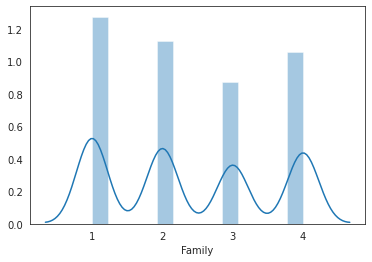

In [ ]:
sb.distplot(datax['Family'])

### No outliners are present in Family

In [ ]:
datax['Mortgage_int'] = pd.cut(datax.Mortgage,
                               bins=[0,100,200,300,400,500,600,700],
                               labels=[0,1,2,3,4,5,6],
                               include_lowest=True)
datax.drop('Mortgage', axis=1, inplace=True)

In [ ]:
datax.head()

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_int
0,25,49,4,1.6,1,1,0,0,0,0
1,45,34,3,1.5,1,1,0,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,1,0


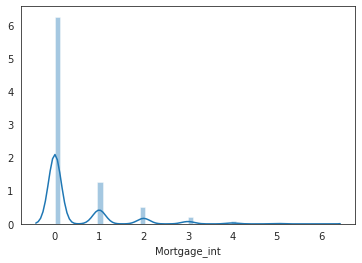

In [ ]:
sb.distplot(datax.Mortgage_int)

## 5.Spliting data into training and test in 70:30 ratio

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(datax, datay, test_size =0.3, stratify = datay, random_state=0)

#6. Using different prediction models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score,plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

In [ ]:
log_reg = LogisticRegression(C=1.0, max_iter=1000)
log_reg.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
class_name = ['will not take loan', 'take loan']

Training Accuracy: 0.95
Testing Accuracy: 0.95
Precision: 0.81
Recall: 0.61


Text(0.5, 1.0, 'Precision-Recall Curve for Logistic Regression')

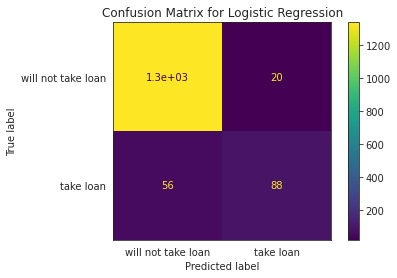

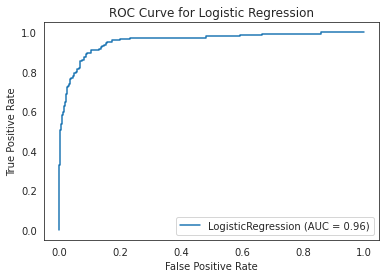

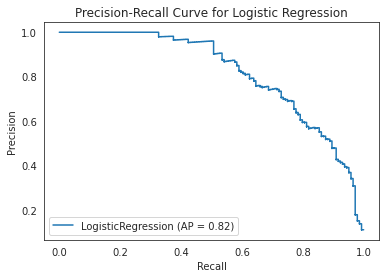

In [ ]:
train_score = log_reg.score(train_x, train_y)
print('Training Accuracy:', train_score.round(2))
test_score = log_reg.score(test_x, test_y)
print('Testing Accuracy:', test_score.round(2))
#used for prediction
y_pred_logi = log_reg.predict(test_x)

precision_logi = precision_score(test_y, y_pred_logi, labels=class_name).round(2)
print('Precision:', precision_logi)
recall_logi = recall_score(test_y, y_pred_logi).round(2)
print('Recall:', recall_logi)

plot_confusion_matrix(log_reg, test_x, test_y, display_labels=class_name)
plt.title('Confusion Matrix for Logistic Regression')

plot_roc_curve(log_reg, test_x, test_y)
plt.title('ROC Curve for Logistic Regression')

plot_precision_recall_curve(log_reg, test_x, test_y)
plt.title('Precision-Recall Curve for Logistic Regression')

# Random forest classification

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=7,n_jobs=-1, random_state=0 )
rfc.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Training Accuracy: 0.99
Testing Accuracy: 0.99
Precision: 0.97
Recall: 0.89


Text(0.5, 1.0, 'Precision-Recall Random Forest Classifier')

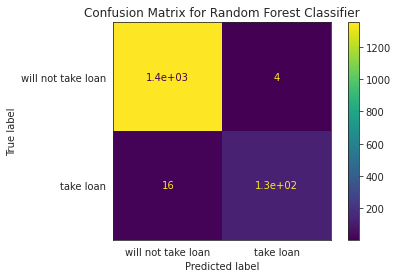

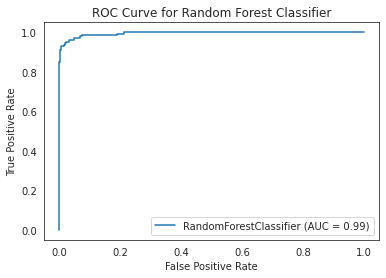

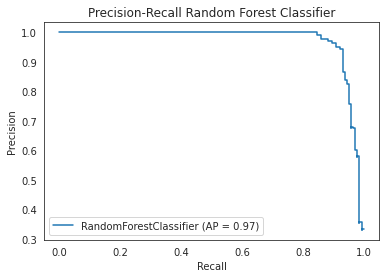

In [ ]:
train_score = rfc.score(train_x, train_y)
print('Training Accuracy:', train_score.round(2))
test_score = rfc.score(test_x, test_y)
print('Testing Accuracy:', test_score.round(2))

y_pred_rf = rfc.predict(test_x)

precision_rf = precision_score(test_y, y_pred_rf, labels=class_name).round(2)
print('Precision:', precision_rf)
recall_rf = recall_score(test_y, y_pred_rf).round(2)
print('Recall:', recall_rf)

plot_confusion_matrix(rfc, test_x, test_y, display_labels=class_name)
plt.title('Confusion Matrix for Random Forest Classifier')

plot_roc_curve(rfc, test_x, test_y)
plt.title('ROC Curve for Random Forest Classifier')

plot_precision_recall_curve(rfc, test_x, test_y)
plt.title('Precision-Recall Random Forest Classifier')

# Decision tree classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(train_x, train_y)
y_pred=dtc.predict(test_x)

Training Accuracy: 1.0
Testing Accuracy: 0.98
Precision: 0.91
Recall: 0.92


Text(0.5, 1.0, 'Precision-Recall Decision Tree Classifier')

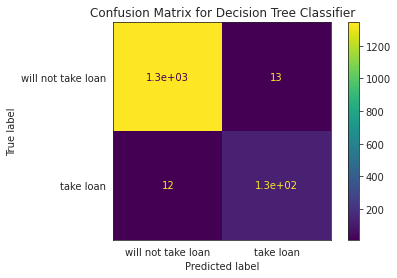

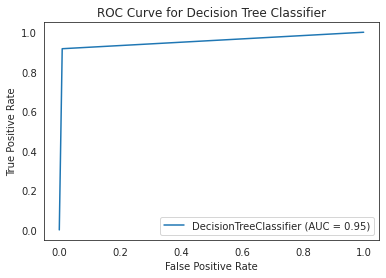

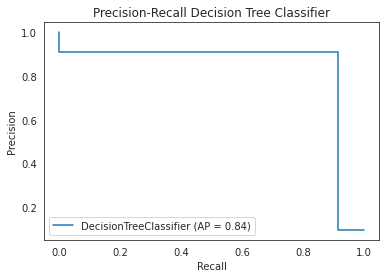

In [ ]:
train_score = dtc.score(train_x, train_y)
print('Training Accuracy:', train_score.round(2))
test_score = dtc.score(test_x, test_y)
print('Testing Accuracy:', test_score.round(2))

precision_dt = precision_score(test_y, y_pred, labels=class_name).round(2)
print('Precision:', precision_dt)
recall_dt = recall_score(test_y, y_pred).round(2)
print('Recall:', recall_dt)

plot_confusion_matrix(dtc, test_x, test_y, display_labels=class_name)
plt.title('Confusion Matrix for Decision Tree Classifier')

plot_roc_curve(dtc, test_x, test_y)
plt.title('ROC Curve for Decision Tree Classifier')

plot_precision_recall_curve(dtc, test_x, test_y)
plt.title('Precision-Recall Decision Tree Classifier')

#Karnott nearest neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k=KNeighborsClassifier(n_neighbors= 15, weights= 'uniform', metric ='euclidean')
k.fit(train_x, train_y)
y_pred=k.predict(test_x)

Training Accuracy: 0.93
Testing Accuracy: 0.92
Precision: 0.66
Recall: 0.35


Text(0.5, 1.0, 'Precision-Recall K nearest neighbour Classifier')

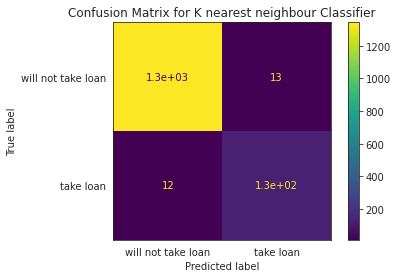

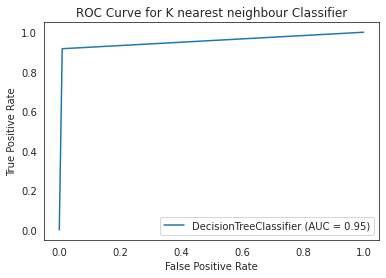

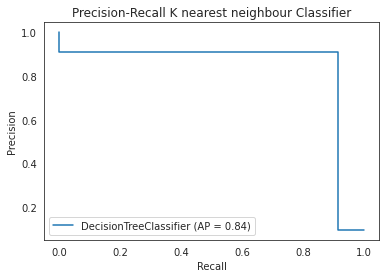

In [ ]:
train_score = k.score(train_x, train_y)
print('Training Accuracy:', train_score.round(2))
test_score = k.score(test_x, test_y)
print('Testing Accuracy:', test_score.round(2))

precision_dt = precision_score(test_y, y_pred, labels=class_name).round(2)
print('Precision:', precision_dt)
recall_dt = recall_score(test_y, y_pred).round(2)
print('Recall:', recall_dt)

plot_confusion_matrix(dtc, test_x, test_y, display_labels=class_name)
plt.title('Confusion Matrix for K nearest neighbour Classifier')

plot_roc_curve(dtc, test_x, test_y)
plt.title('ROC Curve for K nearest neighbour Classifier')

plot_precision_recall_curve(dtc, test_x, test_y)
plt.title('Precision-Recall K nearest neighbour Classifier')

## **Comparison of models**

In [ ]:
from sklearn import model_selection
x=mydata.drop(['Personal Loan'],axis=1)
y=mydata.pop('Personal Loan')

In [ ]:
models =[]
models.append(('k' , KNeighborsClassifier())) 
models.append(('dtc' ,DecisionTreeClassifier())) 
models.append(('rfc' ,RandomForestClassifier())) 
models.append(('log_reg' ,LogisticRegression())) 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


k: 0.914600 (0.011351)
dtc: 0.982600 (0.003693)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


rfc: 0.987800 (0.003400)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

log_reg: 0.943000 (0.009930)


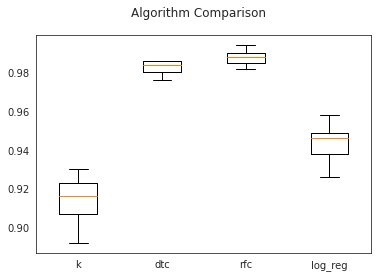

In [ ]:
results = []
names =[]
scoring = 'accuracy'
for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state=12345)
  cv_results = model_selection.cross_val_score(model,x,y,cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)  
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#Conclusion
#### The aim of the Bank is to convert their liability customers for buying loan, so they want to set up a new marketing campaign by checking out the connection between their different data by plotting data and training the data with different algorithms
#### From above plot of comparisons , decision tree algorithm have highest precision and the dataset could be trained by that.

#####I am Thankful to Internshipstudio for providing us the internship in the Machine Learninng field which is emerging field in all over world. We come to know various concepts related to it. I am electronics and telecommunication Engineering Student from Pune. I got the internship offer from National Engineering Olympiad.

#####The scope of Machine Learning in India, as well as in other parts of the world, is high in comparison to other career fields when it comes to job opportunities. According to Gartner, there will be 2.3 million jobs in the field of Artificial Intelligence and Machine Learning by 2022.

#####Thank you for creating interest within us about this field.

#####Thank you Very Much.